In [1]:
import os
import glob
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from pprint import pprint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, merge
from keras.models import Model, Sequential
from keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from src.learning.processing import parse
from keras.layers import LSTM
from keras.layers.wrappers import TimeDistributed as TD
data_dir = "src/client/pictures/"
data_save_dir = "datasets/npy/"
big_dir = "tawn_dataset/"

def normalize_label(old_val, old_min, old_max, new_min, new_max):
    old_val = float(old_val)
    new_val = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
    return new_val

def padding_img_id(string_i):
    padding = 7 - len(string_i)
    for i in range(padding):
        string_i = "0" + string_i
    return string_i

Using TensorFlow backend.


### CAUTION flip only once !

In [21]:
files = parse.get_filenames(data_dir)
flip_dir = data_dir
if not os.path.exists(flip_dir):
    os.makedirs(flip_dir)
    
def flip_angle(label):
    if (label >= 125):
        diff = label - 125
        return 125 - diff
    else:
        diff = 125 - label
        return 125 + diff
    
def flip_dataset(files, directory):
    i = len(files) + 1
    print(len(files))
    for f in files:
        img = cv2.imread(f, 1)
        img = cv2.flip(img, 1)
        f = f.split("_")
        angle = f[1]
        speed = f[2].rstrip(f[2][-4:])
        angle = flip_angle(int(angle))
        img_path = directory + padding_img_id(str(i)) + "_" + str(angle) + "_" + str(speed) + ".jpg"
        cv2.imwrite(img_path, img)
        print(img_path)
        i += 1
        
flip_dataset(files, data_dir)

3587
src/client/pictures/0003588_164_102.jpg
src/client/pictures/0003589_127_62.jpg
src/client/pictures/0003590_135_102.jpg
src/client/pictures/0003591_168_52.jpg
src/client/pictures/0003592_166_102.jpg
src/client/pictures/0003593_211_53.jpg
src/client/pictures/0003594_215_102.jpg
src/client/pictures/0003595_187_58.jpg
src/client/pictures/0003596_112_102.jpg
src/client/pictures/0003597_85_102.jpg
src/client/pictures/0003598_215_48.jpg
src/client/pictures/0003599_187_102.jpg
src/client/pictures/0003600_125_96.jpg
src/client/pictures/0003601_174_102.jpg
src/client/pictures/0003602_125_102.jpg
src/client/pictures/0003603_215_102.jpg
src/client/pictures/0003604_116_102.jpg
src/client/pictures/0003605_191_69.jpg
src/client/pictures/0003606_164_102.jpg
src/client/pictures/0003607_182_65.jpg
src/client/pictures/0003608_125_79.jpg
src/client/pictures/0003609_169_102.jpg
src/client/pictures/0003610_211_102.jpg
src/client/pictures/0003611_125_85.jpg
src/client/pictures/0003612_186_102.jpg
src/cl

src/client/pictures/0003802_208_102.jpg
src/client/pictures/0003803_174_102.jpg
src/client/pictures/0003804_176_102.jpg
src/client/pictures/0003805_125_81.jpg
src/client/pictures/0003806_124_101.jpg
src/client/pictures/0003807_125_102.jpg
src/client/pictures/0003808_125_102.jpg
src/client/pictures/0003809_125_102.jpg
src/client/pictures/0003810_150_102.jpg
src/client/pictures/0003811_176_102.jpg
src/client/pictures/0003812_125_102.jpg
src/client/pictures/0003813_194_56.jpg
src/client/pictures/0003814_195_86.jpg
src/client/pictures/0003815_176_102.jpg
src/client/pictures/0003816_211_52.jpg
src/client/pictures/0003817_133_102.jpg
src/client/pictures/0003818_209_45.jpg
src/client/pictures/0003819_159_102.jpg
src/client/pictures/0003820_125_102.jpg
src/client/pictures/0003821_146_102.jpg
src/client/pictures/0003822_125_102.jpg
src/client/pictures/0003823_125_93.jpg
src/client/pictures/0003824_125_97.jpg
src/client/pictures/0003825_125_102.jpg
src/client/pictures/0003826_134_102.jpg
src/cli

src/client/pictures/0004017_138_102.jpg
src/client/pictures/0004018_185_102.jpg
src/client/pictures/0004019_133_102.jpg
src/client/pictures/0004020_165_102.jpg
src/client/pictures/0004021_165_70.jpg
src/client/pictures/0004022_144_102.jpg
src/client/pictures/0004023_212_45.jpg
src/client/pictures/0004024_174_49.jpg
src/client/pictures/0004025_192_54.jpg
src/client/pictures/0004026_154_102.jpg
src/client/pictures/0004027_203_71.jpg
src/client/pictures/0004028_169_102.jpg
src/client/pictures/0004029_125_102.jpg
src/client/pictures/0004030_125_102.jpg
src/client/pictures/0004031_178_74.jpg
src/client/pictures/0004032_200_94.jpg
src/client/pictures/0004033_135_98.jpg
src/client/pictures/0004034_172_102.jpg
src/client/pictures/0004035_125_62.jpg
src/client/pictures/0004036_170_62.jpg
src/client/pictures/0004037_133_102.jpg
src/client/pictures/0004038_123_102.jpg
src/client/pictures/0004039_157_102.jpg
src/client/pictures/0004040_108_102.jpg
src/client/pictures/0004041_211_53.jpg
src/client/

src/client/pictures/0004225_87_102.jpg
src/client/pictures/0004226_125_102.jpg
src/client/pictures/0004227_198_102.jpg
src/client/pictures/0004228_125_102.jpg
src/client/pictures/0004229_212_78.jpg
src/client/pictures/0004230_125_102.jpg
src/client/pictures/0004231_125_102.jpg
src/client/pictures/0004232_134_102.jpg
src/client/pictures/0004233_215_87.jpg
src/client/pictures/0004234_125_102.jpg
src/client/pictures/0004235_167_102.jpg
src/client/pictures/0004236_215_102.jpg
src/client/pictures/0004237_136_88.jpg
src/client/pictures/0004238_125_102.jpg
src/client/pictures/0004239_215_97.jpg
src/client/pictures/0004240_155_40.jpg
src/client/pictures/0004241_174_80.jpg
src/client/pictures/0004242_125_102.jpg
src/client/pictures/0004243_152_102.jpg
src/client/pictures/0004244_125_81.jpg
src/client/pictures/0004245_215_58.jpg
src/client/pictures/0004246_134_102.jpg
src/client/pictures/0004247_147_102.jpg
src/client/pictures/0004248_178_102.jpg
src/client/pictures/0004249_125_102.jpg
src/clien

src/client/pictures/0004445_137_93.jpg
src/client/pictures/0004446_45_102.jpg
src/client/pictures/0004447_209_84.jpg
src/client/pictures/0004448_125_102.jpg
src/client/pictures/0004449_200_63.jpg
src/client/pictures/0004450_125_102.jpg
src/client/pictures/0004451_168_102.jpg
src/client/pictures/0004452_125_60.jpg
src/client/pictures/0004453_194_62.jpg
src/client/pictures/0004454_134_102.jpg
src/client/pictures/0004455_85_102.jpg
src/client/pictures/0004456_205_102.jpg
src/client/pictures/0004457_125_102.jpg
src/client/pictures/0004458_177_72.jpg
src/client/pictures/0004459_124_102.jpg
src/client/pictures/0004460_215_94.jpg
src/client/pictures/0004461_153_102.jpg
src/client/pictures/0004462_105_102.jpg
src/client/pictures/0004463_125_102.jpg
src/client/pictures/0004464_150_102.jpg
src/client/pictures/0004465_136_96.jpg
src/client/pictures/0004466_206_40.jpg
src/client/pictures/0004467_182_102.jpg
src/client/pictures/0004468_136_96.jpg
src/client/pictures/0004469_166_102.jpg
src/client/p

src/client/pictures/0004653_142_102.jpg
src/client/pictures/0004654_215_102.jpg
src/client/pictures/0004655_206_59.jpg
src/client/pictures/0004656_169_102.jpg
src/client/pictures/0004657_151_102.jpg
src/client/pictures/0004658_167_62.jpg
src/client/pictures/0004659_98_65.jpg
src/client/pictures/0004660_154_102.jpg
src/client/pictures/0004661_215_42.jpg
src/client/pictures/0004662_137_102.jpg
src/client/pictures/0004663_215_45.jpg
src/client/pictures/0004664_125_102.jpg
src/client/pictures/0004665_212_52.jpg
src/client/pictures/0004666_125_42.jpg
src/client/pictures/0004667_215_57.jpg
src/client/pictures/0004668_215_63.jpg
src/client/pictures/0004669_125_102.jpg
src/client/pictures/0004670_215_102.jpg
src/client/pictures/0004671_86_102.jpg
src/client/pictures/0004672_215_102.jpg
src/client/pictures/0004673_148_102.jpg
src/client/pictures/0004674_166_102.jpg
src/client/pictures/0004675_105_102.jpg
src/client/pictures/0004676_147_71.jpg
src/client/pictures/0004677_180_102.jpg
src/client/p

src/client/pictures/0004861_125_67.jpg
src/client/pictures/0004862_125_100.jpg
src/client/pictures/0004863_125_100.jpg
src/client/pictures/0004864_134_65.jpg
src/client/pictures/0004865_153_102.jpg
src/client/pictures/0004866_192_47.jpg
src/client/pictures/0004867_215_54.jpg
src/client/pictures/0004868_125_102.jpg
src/client/pictures/0004869_193_75.jpg
src/client/pictures/0004870_79_79.jpg
src/client/pictures/0004871_125_102.jpg
src/client/pictures/0004872_173_102.jpg
src/client/pictures/0004873_135_102.jpg
src/client/pictures/0004874_193_102.jpg
src/client/pictures/0004875_134_102.jpg
src/client/pictures/0004876_125_102.jpg
src/client/pictures/0004877_125_102.jpg
src/client/pictures/0004878_215_49.jpg
src/client/pictures/0004879_211_72.jpg
src/client/pictures/0004880_125_89.jpg
src/client/pictures/0004881_181_102.jpg
src/client/pictures/0004882_137_97.jpg
src/client/pictures/0004883_125_102.jpg
src/client/pictures/0004884_125_102.jpg
src/client/pictures/0004885_215_102.jpg
src/client/

src/client/pictures/0005081_125_102.jpg
src/client/pictures/0005082_215_102.jpg
src/client/pictures/0005083_211_102.jpg
src/client/pictures/0005084_68_102.jpg
src/client/pictures/0005085_125_102.jpg
src/client/pictures/0005086_185_76.jpg
src/client/pictures/0005087_196_54.jpg
src/client/pictures/0005088_215_40.jpg
src/client/pictures/0005089_98_102.jpg
src/client/pictures/0005090_211_52.jpg
src/client/pictures/0005091_125_102.jpg
src/client/pictures/0005092_206_102.jpg
src/client/pictures/0005093_118_102.jpg
src/client/pictures/0005094_215_48.jpg
src/client/pictures/0005095_141_102.jpg
src/client/pictures/0005096_137_102.jpg
src/client/pictures/0005097_125_102.jpg
src/client/pictures/0005098_61_68.jpg
src/client/pictures/0005099_215_102.jpg
src/client/pictures/0005100_138_102.jpg
src/client/pictures/0005101_125_102.jpg
src/client/pictures/0005102_169_96.jpg
src/client/pictures/0005103_125_102.jpg
src/client/pictures/0005104_144_102.jpg
src/client/pictures/0005105_215_102.jpg
src/client

src/client/pictures/0005299_159_102.jpg
src/client/pictures/0005300_125_100.jpg
src/client/pictures/0005301_95_102.jpg
src/client/pictures/0005302_211_40.jpg
src/client/pictures/0005303_173_84.jpg
src/client/pictures/0005304_212_70.jpg
src/client/pictures/0005305_211_102.jpg
src/client/pictures/0005306_109_102.jpg
src/client/pictures/0005307_208_75.jpg
src/client/pictures/0005308_125_102.jpg
src/client/pictures/0005309_134_102.jpg
src/client/pictures/0005310_137_102.jpg
src/client/pictures/0005311_215_64.jpg
src/client/pictures/0005312_191_47.jpg
src/client/pictures/0005313_125_49.jpg
src/client/pictures/0005314_125_102.jpg
src/client/pictures/0005315_183_64.jpg
src/client/pictures/0005316_215_86.jpg
src/client/pictures/0005317_215_61.jpg
src/client/pictures/0005318_89_92.jpg
src/client/pictures/0005319_134_102.jpg
src/client/pictures/0005320_125_102.jpg
src/client/pictures/0005321_166_102.jpg
src/client/pictures/0005322_125_102.jpg
src/client/pictures/0005323_125_102.jpg
src/client/pi

src/client/pictures/0005515_143_56.jpg
src/client/pictures/0005516_121_102.jpg
src/client/pictures/0005517_175_102.jpg
src/client/pictures/0005518_193_87.jpg
src/client/pictures/0005519_207_102.jpg
src/client/pictures/0005520_215_56.jpg
src/client/pictures/0005521_134_102.jpg
src/client/pictures/0005522_125_52.jpg
src/client/pictures/0005523_135_102.jpg
src/client/pictures/0005524_103_102.jpg
src/client/pictures/0005525_213_40.jpg
src/client/pictures/0005526_108_102.jpg
src/client/pictures/0005527_165_102.jpg
src/client/pictures/0005528_83_102.jpg
src/client/pictures/0005529_187_102.jpg
src/client/pictures/0005530_185_75.jpg
src/client/pictures/0005531_45_102.jpg
src/client/pictures/0005532_209_102.jpg
src/client/pictures/0005533_125_102.jpg
src/client/pictures/0005534_182_57.jpg
src/client/pictures/0005535_125_102.jpg
src/client/pictures/0005536_204_46.jpg
src/client/pictures/0005537_215_102.jpg
src/client/pictures/0005538_196_64.jpg
src/client/pictures/0005539_125_93.jpg
src/client/p

src/client/pictures/0005730_151_97.jpg
src/client/pictures/0005731_125_102.jpg
src/client/pictures/0005732_215_64.jpg
src/client/pictures/0005733_125_102.jpg
src/client/pictures/0005734_125_102.jpg
src/client/pictures/0005735_125_102.jpg
src/client/pictures/0005736_125_59.jpg
src/client/pictures/0005737_210_102.jpg
src/client/pictures/0005738_125_102.jpg
src/client/pictures/0005739_105_102.jpg
src/client/pictures/0005740_192_54.jpg
src/client/pictures/0005741_125_102.jpg
src/client/pictures/0005742_215_54.jpg
src/client/pictures/0005743_116_102.jpg
src/client/pictures/0005744_215_63.jpg
src/client/pictures/0005745_126_102.jpg
src/client/pictures/0005746_125_102.jpg
src/client/pictures/0005747_125_40.jpg
src/client/pictures/0005748_193_102.jpg
src/client/pictures/0005749_176_60.jpg
src/client/pictures/0005750_135_102.jpg
src/client/pictures/0005751_109_102.jpg
src/client/pictures/0005752_169_102.jpg
src/client/pictures/0005753_125_64.jpg
src/client/pictures/0005754_211_63.jpg
src/client

src/client/pictures/0005939_98_102.jpg
src/client/pictures/0005940_99_102.jpg
src/client/pictures/0005941_215_79.jpg
src/client/pictures/0005942_125_79.jpg
src/client/pictures/0005943_125_102.jpg
src/client/pictures/0005944_125_102.jpg
src/client/pictures/0005945_215_46.jpg
src/client/pictures/0005946_211_53.jpg
src/client/pictures/0005947_200_47.jpg
src/client/pictures/0005948_125_64.jpg
src/client/pictures/0005949_125_102.jpg
src/client/pictures/0005950_141_102.jpg
src/client/pictures/0005951_200_48.jpg
src/client/pictures/0005952_201_68.jpg
src/client/pictures/0005953_152_102.jpg
src/client/pictures/0005954_96_102.jpg
src/client/pictures/0005955_180_101.jpg
src/client/pictures/0005956_196_58.jpg
src/client/pictures/0005957_176_102.jpg
src/client/pictures/0005958_125_102.jpg
src/client/pictures/0005959_192_102.jpg
src/client/pictures/0005960_184_102.jpg
src/client/pictures/0005961_125_83.jpg
src/client/pictures/0005962_181_54.jpg
src/client/pictures/0005963_153_102.jpg
src/client/pic

src/client/pictures/0006174_125_102.jpg
src/client/pictures/0006175_84_102.jpg
src/client/pictures/0006176_125_102.jpg
src/client/pictures/0006177_215_51.jpg
src/client/pictures/0006178_167_102.jpg
src/client/pictures/0006179_201_66.jpg
src/client/pictures/0006180_170_102.jpg
src/client/pictures/0006181_172_59.jpg
src/client/pictures/0006182_125_76.jpg
src/client/pictures/0006183_215_102.jpg
src/client/pictures/0006184_211_51.jpg
src/client/pictures/0006185_215_82.jpg
src/client/pictures/0006186_171_58.jpg
src/client/pictures/0006187_187_102.jpg
src/client/pictures/0006188_106_66.jpg
src/client/pictures/0006189_206_84.jpg
src/client/pictures/0006190_175_102.jpg
src/client/pictures/0006191_215_48.jpg
src/client/pictures/0006192_180_102.jpg
src/client/pictures/0006193_109_102.jpg
src/client/pictures/0006194_85_102.jpg
src/client/pictures/0006195_134_102.jpg
src/client/pictures/0006196_125_102.jpg
src/client/pictures/0006197_178_55.jpg
src/client/pictures/0006198_188_102.jpg
src/client/pi

src/client/pictures/0006385_215_102.jpg
src/client/pictures/0006386_175_102.jpg
src/client/pictures/0006387_199_54.jpg
src/client/pictures/0006388_210_52.jpg
src/client/pictures/0006389_169_102.jpg
src/client/pictures/0006390_125_102.jpg
src/client/pictures/0006391_125_83.jpg
src/client/pictures/0006392_117_102.jpg
src/client/pictures/0006393_215_52.jpg
src/client/pictures/0006394_173_54.jpg
src/client/pictures/0006395_125_102.jpg
src/client/pictures/0006396_134_102.jpg
src/client/pictures/0006397_134_102.jpg
src/client/pictures/0006398_215_46.jpg
src/client/pictures/0006399_212_78.jpg
src/client/pictures/0006400_209_54.jpg
src/client/pictures/0006401_195_102.jpg
src/client/pictures/0006402_190_102.jpg
src/client/pictures/0006403_165_102.jpg
src/client/pictures/0006404_212_62.jpg
src/client/pictures/0006405_211_57.jpg
src/client/pictures/0006406_140_102.jpg
src/client/pictures/0006407_194_102.jpg
src/client/pictures/0006408_125_84.jpg
src/client/pictures/0006409_194_79.jpg
src/client/p

src/client/pictures/0006602_196_57.jpg
src/client/pictures/0006603_183_62.jpg
src/client/pictures/0006604_134_102.jpg
src/client/pictures/0006605_125_102.jpg
src/client/pictures/0006606_140_102.jpg
src/client/pictures/0006607_215_55.jpg
src/client/pictures/0006608_182_71.jpg
src/client/pictures/0006609_125_102.jpg
src/client/pictures/0006610_125_102.jpg
src/client/pictures/0006611_125_102.jpg
src/client/pictures/0006612_195_56.jpg
src/client/pictures/0006613_211_52.jpg
src/client/pictures/0006614_200_47.jpg
src/client/pictures/0006615_193_84.jpg
src/client/pictures/0006616_198_54.jpg
src/client/pictures/0006617_140_97.jpg
src/client/pictures/0006618_187_57.jpg
src/client/pictures/0006619_125_66.jpg
src/client/pictures/0006620_212_46.jpg
src/client/pictures/0006621_133_102.jpg
src/client/pictures/0006622_208_94.jpg
src/client/pictures/0006623_125_102.jpg
src/client/pictures/0006624_215_76.jpg
src/client/pictures/0006625_72_102.jpg
src/client/pictures/0006626_211_68.jpg
src/client/pictur

src/client/pictures/0006822_139_102.jpg
src/client/pictures/0006823_177_80.jpg
src/client/pictures/0006824_154_66.jpg
src/client/pictures/0006825_211_44.jpg
src/client/pictures/0006826_109_102.jpg
src/client/pictures/0006827_176_102.jpg
src/client/pictures/0006828_186_80.jpg
src/client/pictures/0006829_173_102.jpg
src/client/pictures/0006830_192_85.jpg
src/client/pictures/0006831_201_69.jpg
src/client/pictures/0006832_135_70.jpg
src/client/pictures/0006833_215_102.jpg
src/client/pictures/0006834_172_102.jpg
src/client/pictures/0006835_215_63.jpg
src/client/pictures/0006836_177_102.jpg
src/client/pictures/0006837_171_102.jpg
src/client/pictures/0006838_200_102.jpg
src/client/pictures/0006839_146_61.jpg
src/client/pictures/0006840_134_61.jpg
src/client/pictures/0006841_215_55.jpg
src/client/pictures/0006842_214_94.jpg
src/client/pictures/0006843_186_102.jpg
src/client/pictures/0006844_200_102.jpg
src/client/pictures/0006845_211_62.jpg
src/client/pictures/0006846_166_102.jpg
src/client/pi

src/client/pictures/0007036_159_67.jpg
src/client/pictures/0007037_125_102.jpg
src/client/pictures/0007038_76_86.jpg
src/client/pictures/0007039_151_102.jpg
src/client/pictures/0007040_62_102.jpg
src/client/pictures/0007041_153_102.jpg
src/client/pictures/0007042_171_102.jpg
src/client/pictures/0007043_190_47.jpg
src/client/pictures/0007044_176_102.jpg
src/client/pictures/0007045_215_53.jpg
src/client/pictures/0007046_94_102.jpg
src/client/pictures/0007047_166_102.jpg
src/client/pictures/0007048_79_82.jpg
src/client/pictures/0007049_160_102.jpg
src/client/pictures/0007050_170_75.jpg
src/client/pictures/0007051_113_102.jpg
src/client/pictures/0007052_210_102.jpg
src/client/pictures/0007053_116_97.jpg
src/client/pictures/0007054_191_62.jpg
src/client/pictures/0007055_212_46.jpg
src/client/pictures/0007056_186_102.jpg
src/client/pictures/0007057_125_102.jpg
src/client/pictures/0007058_142_102.jpg
src/client/pictures/0007059_203_71.jpg
src/client/pictures/0007060_125_71.jpg
src/client/pict

for root, dirs, files in os.walk(data_dir):
    for file in files:
        s = file.split("_")
        f = padding_img_id(s[0]) + "_" + s[1] + "_" + s[2]
        os.rename(data_dir + file, data_dir + f)

In [18]:
image_paths = []
angle_labels = []
speed_labels = []
for root, dirs, files in os.walk(data_dir):
    nb_data = len(files)
    files = sorted(files)
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            image_paths.append(filename)
            s = filename.split("_")
            angle_labels.append(float(s[1]))
            speed_labels.append(float(s[2].rstrip(s[2][-4:])))
image_paths = np.array(image_paths)
angle_labels = np.array(angle_labels)
speed_labels = np.array(speed_labels)

In [19]:
(angle_labels.shape, speed_labels.shape, image_paths.shape)

((3587,), (3587,), (3587,))

In [4]:
from random import shuffle

def build_dataset(datas):
    dataset = np.zeros((datas.shape[0], 120, 160, 3))
    for i in range(datas.shape[0]):    
        img = cv2.imread(datas[i])
        y1 = int(img.shape[0] / 2)
        img = img[y1:, :]
        img = cv2.resize(img, (160, 120), interpolation = cv2.INTER_CUBIC)
        dataset[i, :, :, :] = img
    return dataset

def build_labels(datas):
    labels = np.array([data[1] for data in datas])
    return to_categorical(labels, 15)


def myGenerator(datas, angle_labels, speed_labels, batch=16):
    i = 0
    while (True):
        if (i == 0):
            loaded_img = build_dataset(datas[:batch])
        else:
            loaded_img = build_dataset(datas[(i - 2):(i + batch)])
        
        nb_batch = i
        x = np.zeros((batch, 3, 120, 160, 3))
        y = np.zeros((batch, 2))
        
        u = 0
        
        while (nb_batch < i + batch and nb_batch < datas.shape[0]):
            if (nb_batch == 0):
                x[u, 0, :, :, :] = loaded_img[u]
                x[u, 1, :, :, :] = loaded_img[u]
                x[u, 2, :, :, :] = loaded_img[u]
            elif (nb_batch == 1):
                x[u, 0, :, :, :] = loaded_img[u]
                x[u, 1, :, :, :] = loaded_img[u - 1]
                x[u, 2, :, :, :] = loaded_img[u - 1]
            elif (i == 0):
                x[u, 0, :, :, :] = loaded_img[u]
                x[u, 1, :, :, :] = loaded_img[u - 1]
                x[u, 2, :, :, :] = loaded_img[u - 2]
            else:
                idx = u + 2
                x[u, 0, :, :, :] = loaded_img[idx]
                x[u, 1, :, :, :] = loaded_img[idx - 1]
                x[u, 2, :, :, :] = loaded_img[idx - 2]
                #cv2.imwrite("img0.png", loaded_img[idx])
                #cv2.imwrite("img1.png", loaded_img[idx - 1])
                #cv2.imwrite("img2.png", loaded_img[idx - 2])
            y[u, 0] = angle_labels[nb_batch]
            y[u, 1] = speed_labels[nb_batch]
            nb_batch += 1
            u += 1
        yield x, y
        i += batch

In [5]:
sep_train = int(nb_data * 0.8)
sep_test = nb_data - sep_train
gen_train = myGenerator(image_paths[:sep_train], angle_labels[:sep_train], speed_labels[:sep_train], 16)
gen_test = myGenerator(image_paths[sep_train:], angle_labels[sep_train:], speed_labels[sep_train:], 16)

In [6]:
x, y = next(gen_train)

In [7]:
angle_labels = ((angle_labels - 35) / 170.0 - 0.5) * 2
idx = 0
for spd in speed_labels:
    speed_labels[idx] = normalize_label(spd, 40, 102, 0, 1)
    idx += 1

In [8]:
print(str(speed_labels))

[ 0.          1.          1.         ...,  0.19354839  0.19354839
  0.19354839]


In [9]:
print(str(angle_labels))

[ 0.05882353  0.05882353  0.05882353 ..., -0.95294118 -0.95294118
 -0.95294118]


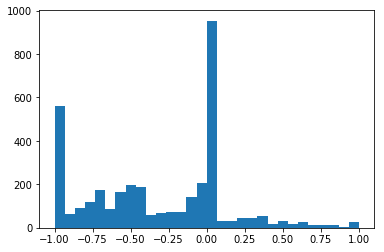

In [10]:
plt.hist(angle_labels, bins=30)
plt.show()

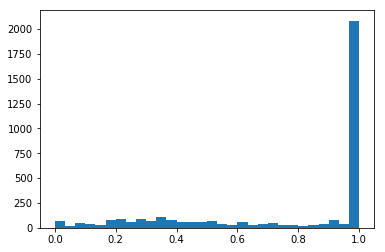

In [11]:
plt.hist(speed_labels, bins=30)
plt.show()

In [12]:
def rnn_lstm(seq_length=3, num_outputs=2, image_shape=(120,160,3)):

    img_seq_shape = (seq_length,) + image_shape   
    img_in = Input(batch_shape = img_seq_shape, name='img_in')
    
    x = Sequential()
    x.add(TD(Convolution2D(24, (5,5), strides=(2,2), activation='relu'), input_shape=img_seq_shape))
    x.add(TD(Convolution2D(32, (5,5), strides=(2,2), activation='relu')))
    x.add(TD(Convolution2D(64, (3,3), strides=(2,2), activation='relu')))
    x.add(TD(Convolution2D(64, (3,3), strides=(1,1), activation='relu')))
    x.add(TD(Convolution2D(64, (3,3), strides=(1,1), activation='relu')))
    x.add(TD(Flatten(name='flattened')))
    x.add(TD(Dense(100, activation='relu')))
    x.add(TD(Dropout(.1)))
      
    x.add(LSTM(128, return_sequences=True, name="LSTM_seq"))
    x.add(Dropout(.1))
    x.add(LSTM(128, return_sequences=False, name="LSTM_out"))
    x.add(Dropout(.1))
    x.add(Dense(50, activation='relu'))
    x.add(Dropout(.1))
    x.add(Dense(num_outputs, activation='linear', name='model_outputs'))
    
    x.compile(optimizer='adam',
                  loss={'model_outputs' : 'mean_squared_error'})
    
    print(x.summary())

    return x

In [13]:
model = rnn_lstm()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 3, 58, 78, 24)     1824      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 27, 37, 32)     19232     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 13, 18, 64)     18496     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 3, 11, 16, 64)     36928     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 3, 9, 14, 64)      36928     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 3, 8064)           0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 3, 100)            806500    
__________

In [14]:
model_path = os.path.abspath("models/speed_model.h5")
checkpointer = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', mode='min')
hist = model.fit_generator(generator=gen_train, validation_data=gen_test, steps_per_epoch=(sep_train / 16), validation_steps=(sep_test / 16), epochs=10, shuffle=False, callbacks=[checkpointer])

Epoch 1/10
180/179 [==============================] - 33s 185ms/step - loss: 1571.1235 - val_loss: 795.8556
Epoch 2/10
180/179 [==============================] - 29s 161ms/step - loss: 0.2208 - val_loss: 8.6724e-06
Epoch 3/10
180/179 [==============================] - 30s 165ms/step - loss: 1.0910e-04 - val_loss: 2.1407e-06
Epoch 4/10
180/179 [==============================] - 30s 167ms/step - loss: 1.0110e-04 - val_loss: 5.0034e-06
Epoch 5/10
180/179 [==============================] - 29s 160ms/step - loss: 1.0012e-04 - val_loss: 6.8587e-06
Epoch 6/10
180/179 [==============================] - 29s 160ms/step - loss: 9.3045e-05 - val_loss: 9.1428e-06
Epoch 7/10
180/179 [==============================] - 29s 163ms/step - loss: 9.0167e-05 - val_loss: 2.0520e-05
Epoch 8/10
180/179 [==============================] - 29s 164ms/step - loss: 8.4631e-05 - val_loss: 3.8342e-06
Epoch 9/10
180/179 [==============================] - 29s 163ms/step - loss: 8.5587e-05 - val_loss: 1.3866e-06
Epoch 10

In [ ]:
model.summary()

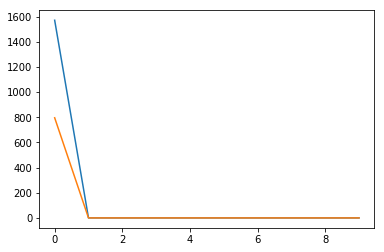

In [16]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

In [ ]:
model.save("models/new_cam.h5")

In [ ]:
plt.hist(model.predict(data)[0], bins=30)
plt.show()

In [ ]:
plt.hist(labels, bins=30)
plt.show()

In [ ]:
data.shape

In [ ]:
labels.shape

In [ ]:
mask = np.where((labels > -0.08) & (labels < 0.08))
mask = (np.random.choice(mask[0], int(2 * mask[0].shape[0] / 3), replace=False),)

maska = np.ones(labels.shape,dtype=bool)
maska[mask] = False

In [ ]:
labels[maska].shape

In [ ]:
labels = labels[maska]
data = data[maska]

In [ ]:
plt.hist(labels, bins=30)
plt.show()

In [ ]:
test = myGenerator(image_paths, labels, 16)
for j in range(0, 4):
    x, y = next(test)
    print(x.shape)
    print(y.shape)